## Stack plotting examples

In [100]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt


from pymapmanager.mmMap import mmMap

# load a single time-point stack
#from pymapmanager.mmStack import mmStack

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### The rest of this example will manipulate stacks loaded from a map. The interface is the same for both single time-point and map stacks.

In these examples, we will load a map with 9 sessions (stacks) and plot values from individual stacks within the map.

See **map.ipynb** for examples of plotting annotation values in a map ACROSS all of its stacks.



In [101]:
# load a map
filePath = '/Users/cudmore/Desktop/data/rr30a/rr30a.txt'
filePath = '/media/cudmore/data/richard/rr30a/rr30a.txt'
myMap = mmMap(filePath=filePath)

print(myMap)

#check the number of sessions in the map
#for i in range(m.numSessions):
#    print(m._getStackName(i))

# each mmMap is an iterator over mmStack
for aStack in myMap:
    print(f'{aStack.name} is type {type(aStack)}')


map rr30a loaded in 0.18 seconds.
map:rr30a map segments:5 stacks:9 total object:2467
rr30a_s0 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s1 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s2 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s3 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s4 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s5 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s6 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s7 is type <class 'pymapmanager.mmStack.mmStack'>
rr30a_s8 is type <class 'pymapmanager.mmStack.mmStack'>


In [102]:
#Grab the analysis pd.DataFrame for the first stack. Each row is a single 3D point annotation.
df = myMap.stacks[0].stackdb

# our annotation list can be heterogeneous and we use 'roiType' to gorup them

#Look at the first 5 spines in the stack
df[df['roiType'].isin(['spineROI'])].head()

,Idx,roiType,roiTypeNum,x,y,z,channel,groupID,parentID,cPnt,...,utssmods_int2,utsmmodm_int2,utssdods_int2,utsmdodm_int2,utssdtds_int2,utsmdtdm_int2,utdsdods_int2,utdmdodm_int2,uSEV_int2,Unnamed: 53_int2
66,66,spineROI,0,51.686,28.691,31,1,NaN,0.0,71.0,...,152837.0,-189.959982,1.619935,0.672456,0.443477,0.193448,3.652803,3.476159,0.463557,NaN
67,67,spineROI,0,45.800,30.019,31,1,NaN,0.0,19.0,...,60181.0,-284.519001,1.205345,0.547312,0.341139,0.161059,3.533297,3.398204,0.555353,NaN
68,68,spineROI,0,49.955,29.384,31,1,NaN,0.0,58.0,...,122724.0,-144.261976,1.606041,0.691765,0.408477,0.186142,3.931778,3.716326,0.434495,NaN
69,69,spineROI,0,53.683,27.691,30,1,NaN,0.0,93.0,...,181686.0,-52.670997,1.723226,0.906976,0.497436,0.269812,3.464214,3.361511,0.584764,NaN
70,70,spineROI,0,58.368,27.422,32,1,NaN,0.0,133.0,...,-17398.0,-355.524012,0.935814,0.405361,0.266466,0.120523,3.511940,3.363353,0.418538,NaN


In [113]:
# Our point annotations have different types
print(df['roiType'].unique())

['globalPIvot' 'pivotPnt' 'controlPnt' 'spineROI']


## Three ways to retreive annotations

 - The raw DataFrame
 - using getStackValues2() where we ask for values from one column of DataFrame
 - using getStackValues3() where we use a 'plotdict' to retrevie multiple columns silultaneously
 
 
 ### Raw DataFrame
 ### Each point annotation has an 'x', 'y', and 'z' column corresponding to its position in the stack

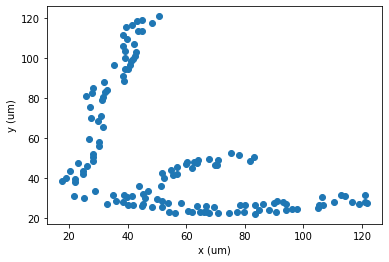

In [103]:
# Make some plots

# grab all spines in the first stack, we will use this dataframe for a few plots
df = m.stacks[0].stackdb
spines = df[df['roiType'].isin(['spineROI'])]

x = spines['x'].values
y = spines['y'].values

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### Use the stack API getStackValues2() to get annotation values

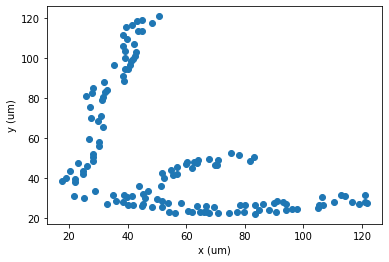

In [104]:
aStack = myMap.stacks[0]

x = aStack.getStackValues2('x')
y = aStack.getStackValues2('y')

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### Use the stack API getStackValues3() to get annotation values

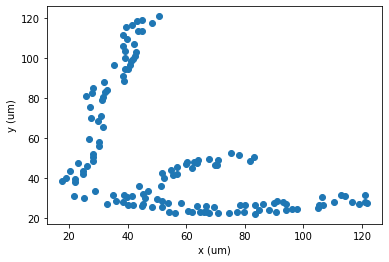

In [105]:
from pymapmanager.mmUtil import newplotdict

aStack = myMap.stacks[0]

pd = newplotdict()
pd['xstat'] = 'x'
pd['ystat'] = 'y'

pd = aStack.getStackValues3(pd)

# pd now has keeys corresponding to the xstat/ystat we asked for

# plot with matplotlib
plt.plot(pd['x'], pd['y'], 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### A mmStack holds two main type of data (i) images and (ii) annotations

Annotations come in two forms (3D points and tracings)

We have been pulling 3D point annotations (of type spineROI).

There are also 'tracings' with each tracing being an ordered list of 3D points representing a line through the image data.

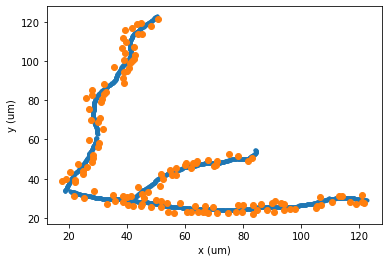

In [106]:
# Plot the spines along with dendritic tracing (lines)

aStack = myMap.stacks[0]

# get the lines for stack 0
xyzLine = aStack.line.getLine() #this returns a 2d numpy array with columns of (x,y,z)
plt.plot(xyzLine[:,0], xyzLine[:,1], '.')

# plot the spines
x = aStack.getStackValues2('x')  # defaults to type=spineROI
y = aStack.getStackValues2('y')

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### Each line segment has a segmentID. Here we will plot just segments [0,1]

Note the similarity and difference between this and previous plot.

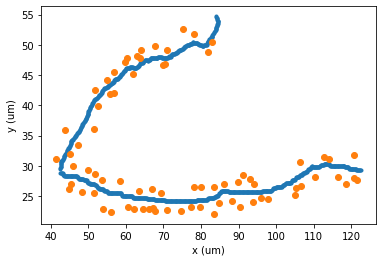

In [107]:
# plot spines in the first and second segment

aStack = myMap.stacks[0]

stackIdx = 0
segmentID = [0, 1] # possible values are 0,1,2,3,4,5,6,7 as there are a total of 8 segments in the map

# plot the lines for stack 0, segment 1
xyzLine = aStack.line.getLine(segmentID) #this returns a 2d numpy array with columns of (x,y,z)
plt.plot(xyzLine[:,0], xyzLine[:,1], '.')

#plotSpines = spines[spines['parentID'].isin(denedriteID)]
# getValues() returns a list of numbers for a given stat
x = aStack.getStackValues2('x', segmentID=segmentID)
y = aStack.getStackValues2('y', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.show()

### Plot spines and lines in 3D

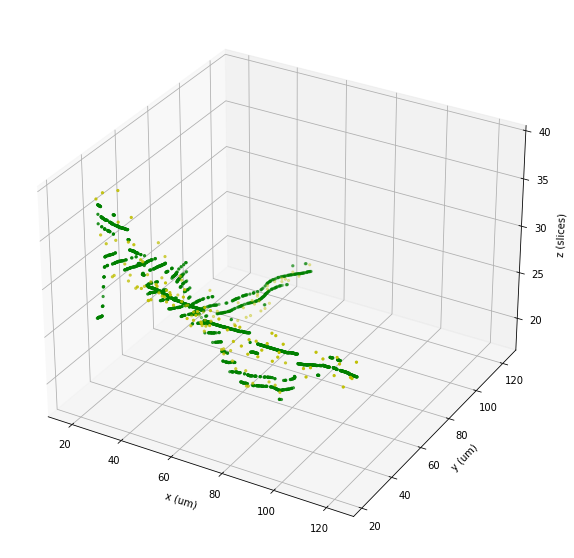

In [108]:
# each spine and line is actually a 3D point

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

aStack = myMap.stacks[0]

segmentID = [] # set segmentID to empty and we can get objects from all segments

# grab all lines
xyzLine = aStack.line.getLine(segmentID) #this returns a 2d numpy array with columns of (x,y,z)

# grab all x, y, and z of spines
x = aStack.getStackValues2('x', segmentID=segmentID)
y = aStack.getStackValues2('y', segmentID=segmentID)
z = aStack.getStackValues2('z', segmentID=segmentID) # assuming z-step is 1 um this is equivalent to um (not always the case!)

# plot with matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# plot the lines
ax.scatter(xyzLine[:,0], xyzLine[:,1], xyzLine[:,2], marker='.', c='g') # plot lines

# plot the 3d annotations
ax.scatter(x, y, z, marker='.', c='y') # plot spines

ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_zlabel('z (slices)')

numSlices = aStack.numSlices # FIXED: this is not valid until image is loaded -->> BAD BAD BAD
#ax.set_zlim(numSlices, 0)

plt.show()

### Up till now we have just been plotting the x/y image coordinates of spines

Point and line annotations have lots of 'derived' values after analysis is performed

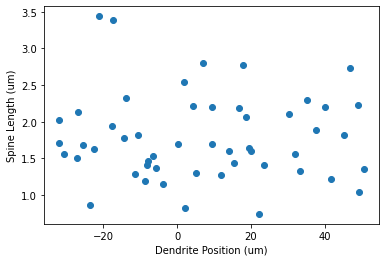

In [109]:
# up till now we have just been plotting the x/y image coordinates of spines

aStack = myMap.stacks[0]

stackIdx = 0
segmentID = [0]

# plot spine length versus position along the dendritic segment
x = aStack.getStackValues2('pDist', segmentID=segmentID)
y = aStack.getStackValues2('sLen3d_int1', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Dendrite Position (um)')
plt.ylabel('Spine Length (um)')
plt.show()

## Pulling segment statistics using pandas pivot tables

In [111]:
# we were using pd as a dict, reload pandas as pd
import pandas as pd

aStack = myMap.stacks[0]

stackIdx = 1
df = aStack.stackdb

#print(df.columns)

# pandas pivot_table() pulls statistics (in this case, the mean, std, and n)
# for each unique value found in a column (in this case, 'parentID').

stat = 'sLen3d_int1'
pd.pivot_table(df,index=['parentID'],values=[stat],aggfunc=[np.mean, np.std, lambda x: len(x.dropna().unique())])

# That last term 'lambda x: len(x.dropna().unique())' is used to count the number of spines in each segment.
# This is getting complicated, time to learn python

# TODO: modernize this example code
#aggList = ['mean', 'std']
#dfTable = df.groupby(['parentID'])

,mean,std,<lambda>
,sLen3d_int1,sLen3d_int1,sLen3d_int1
parentID,,,
0.0,1.783183,0.589693,51
1.0,1.505582,0.514932,25
2.0,2.118359,0.765817,37
3.0,2.713628,1.091574,11
4.0,2.354529,0.701026,15


### Till now we have been accessing annotations. Now access images

self._images.shape: (70, 1024, 1024)
self._images.dtype: uint16
mmStack.loadStack() loaded map session 0 channel 2 pixels (70, 1024, 1024) in 0.05 seconds.


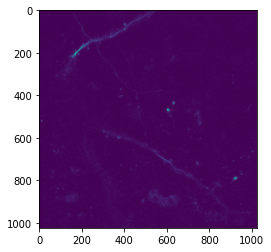

In [112]:
aStack = myMap.stacks[0]

aStack.loadStackImages()  ## until calling this, images are not loaded


imageVolume = aStack.images

slice = 12
oneImage = imageVolume[slice,:,:]

plt.imshow(oneImage);